In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
data_path = r"E:\web-data-mining\data"

orders = pd.read_csv(f"{data_path}\\orders.csv")
order_products_prior = pd.read_csv(f"{data_path}\\order_products__prior.csv")
order_products_train = pd.read_csv(f"{data_path}\\order_products__train.csv")
products = pd.read_csv(f"{data_path}\\products.csv")
aisles = pd.read_csv(f"{data_path}\\aisles.csv")
departments = pd.read_csv(f"{data_path}\\departments.csv")

C:\Users\Hp\AppData\Local\Temp\ipykernel_9456\3040409428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=orders, palette="Blues_d")


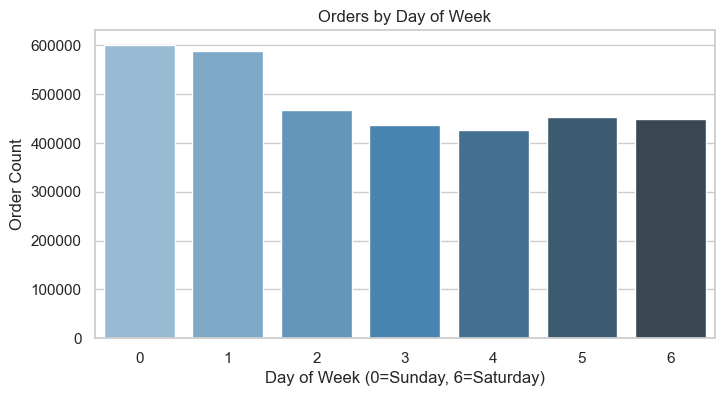

In [4]:
#Orders by Day of the Week
plt.figure(figsize=(8, 4))
sns.countplot(x='order_dow', data=orders, palette="Blues_d")
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0=Sunday, 6=Saturday)")
plt.ylabel("Order Count")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9456\2259672032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour_of_day', data=orders, palette="coolwarm")


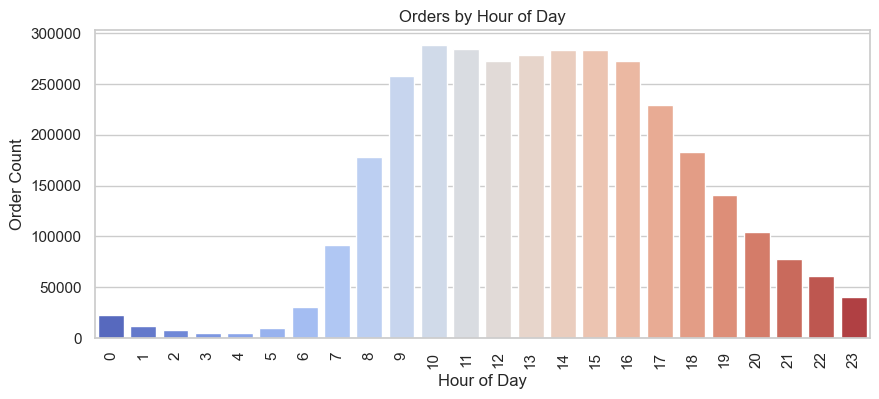

In [5]:
#Orders by Hour of the Day
plt.figure(figsize=(10, 4))
sns.countplot(x='order_hour_of_day', data=orders, palette="coolwarm")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Order Count")
plt.xticks(rotation=90)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9456\88168114.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_name', data=top_products, palette="viridis")


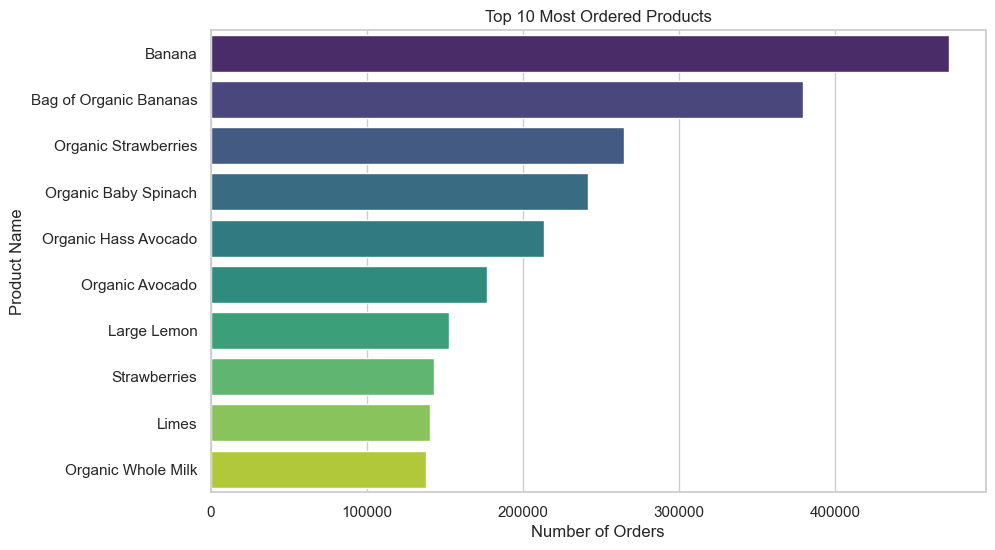

In [6]:
#Top 10 Most Ordered Products
top_products = order_products_prior['product_id'].value_counts().head(10).reset_index()
top_products.columns = ['product_id', 'count']
top_products = top_products.merge(products, on='product_id')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='product_name', data=top_products, palette="viridis")
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.show()

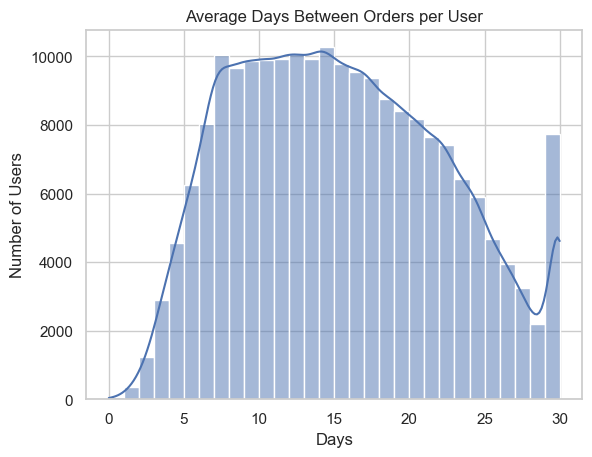

In [7]:
#Average Days Between Orders per User
user_days = orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()
sns.histplot(user_days["days_since_prior_order"], bins=30, kde=True)
plt.title("Average Days Between Orders per User")
plt.xlabel("Days")
plt.ylabel("Number of Users")
plt.show()

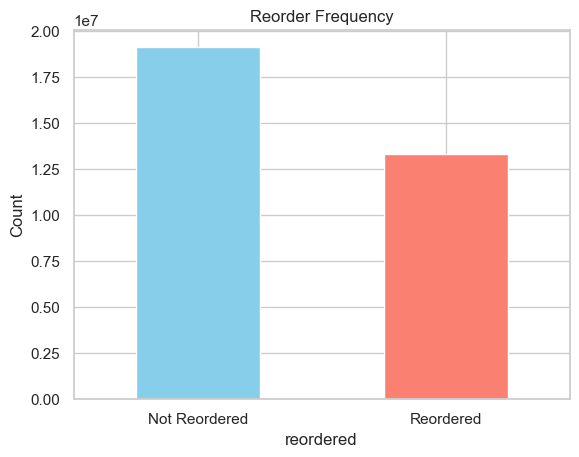

In [8]:
#How Often Users Reorder
order_products_prior["reordered"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Reorder Frequency")
plt.xticks([0, 1], ["Not Reordered", "Reordered"], rotation=0)
plt.ylabel("Count")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9456\3555116470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="reordered", y="product_name", data=top_reordered, palette="crest")


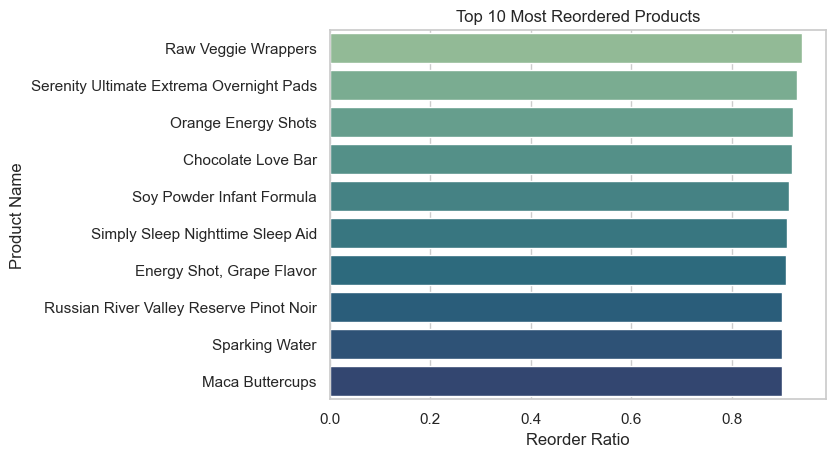

In [9]:
# Most Reordered Products
reordered_prods = order_products_prior.groupby("product_id")["reordered"].mean().reset_index()
reordered_prods = reordered_prods.merge(products, on="product_id")
top_reordered = reordered_prods.sort_values("reordered", ascending=False).head(10)

sns.barplot(x="reordered", y="product_name", data=top_reordered, palette="crest")
plt.title("Top 10 Most Reordered Products")
plt.xlabel("Reorder Ratio")
plt.ylabel("Product Name")
plt.show()

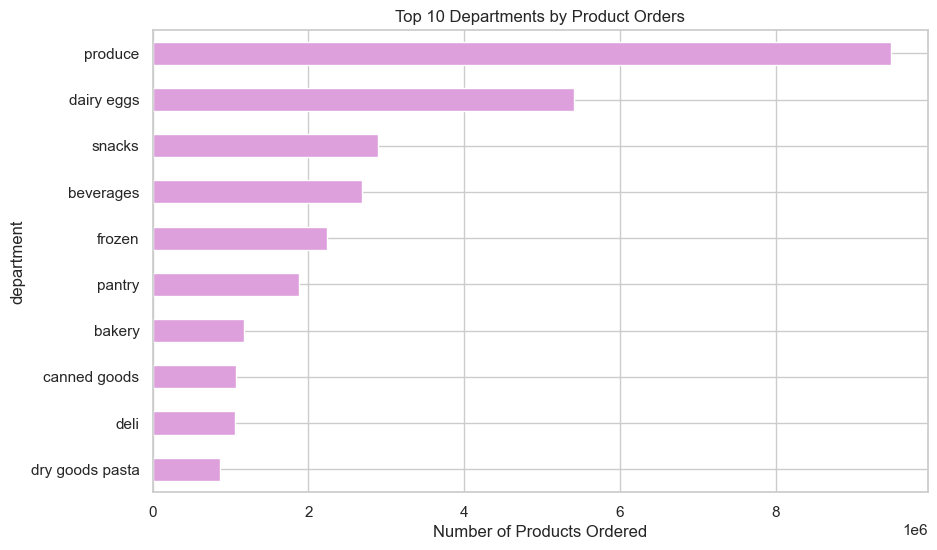

In [10]:
#Popular Departments
prod_dept = products.merge(departments, on='department_id')
dept_counts = order_products_prior.merge(prod_dept, on='product_id').groupby('department')['product_id'].count().sort_values(ascending=False).head(10)

dept_counts.plot(kind='barh', figsize=(10,6), color='plum')
plt.title("Top 10 Departments by Product Orders")
plt.xlabel("Number of Products Ordered")
plt.gca().invert_yaxis()
plt.show()

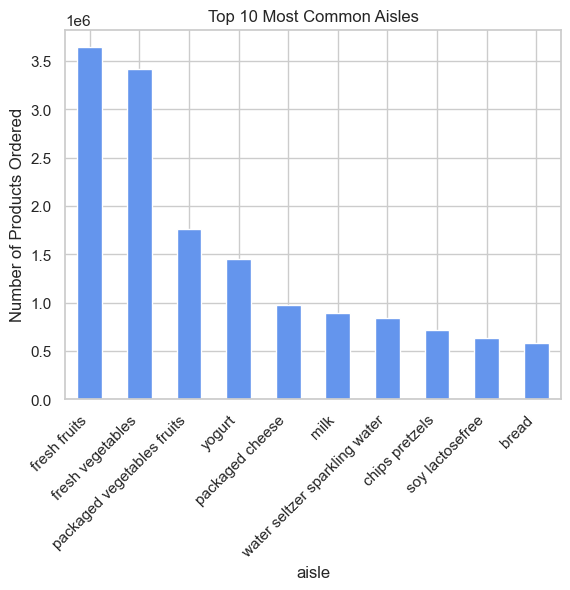

In [11]:
# Most Common Aisles in Popular Departments
prod_full = products.merge(aisles, on="aisle_id").merge(departments, on="department_id")
top_aisles = order_products_prior.merge(prod_full, on="product_id").groupby("aisle")["product_id"].count().sort_values(ascending=False).head(10)

top_aisles.plot(kind="bar", color="cornflowerblue")
plt.title("Top 10 Most Common Aisles")
plt.ylabel("Number of Products Ordered")
plt.xticks(rotation=45, ha="right")
plt.show()